In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [108]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [109]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration   
393  27.0          4         140.0        86.0  2790.0          15.6  \
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Europe  Japan    USA  
393          82   False  False   True  
394          82    True  False  False  
395          82   False  False   True  
396          82   False  False   True  
397          82   False  False   True

In [110]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [111]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [112]:

train_features = train_features[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']]
normalizer = tf.keras.layers.Normalization()
# normalizer.adapt(train_features)


In [113]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
# horsepower_normalizer.adapt(horsepower)

In [114]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [115]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 56ms/step


array([[ 0.897],
       [ 0.507],
       [-1.656],
       [ 1.258],
       [ 1.138],
       [ 0.447],
       [ 1.348],
       [ 1.138],
       [ 0.296],
       [ 0.507]], dtype=float32)

In [116]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [117]:

history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

314


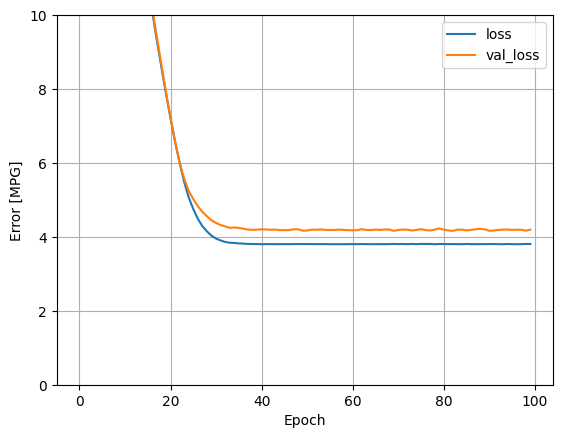

In [118]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [119]:
train_features

Cylinders  Displacement  Horsepower  Weight  Acceleration
146          4          90.0        75.0  2125.0          14.5
282          4         140.0        88.0  2890.0          17.3
69           8         350.0       160.0  4456.0          13.5
378          4         105.0        63.0  2125.0          14.7
331          4          97.0        67.0  2145.0          18.0
..         ...           ...         ...     ...           ...
281          6         200.0        85.0  2990.0          18.2
229          8         400.0       180.0  4220.0          11.1
150          4         108.0        93.0  2391.0          15.5
145          4          83.0        61.0  2003.0          19.0
182          4         107.0        86.0  2464.0          15.5

[314 rows x 5 columns]

In [120]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64